# Working with personal data requests


In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

### Your task

Import your own personal data file (or better yet, several of them!). Extract just the timestamp data. Export this timestamp data as a CSV file and save it on your machine.


### What if you have _other_ types of data?

A summary of pandas input/output (I/O) tools is [here](https://pandas.pydata.org/docs/user_guide/io.html). Here are some things we can directly import:
* CSVs
* JSON
* text (rtf, txt)
* HTML
* MS Excel
* Pickle (Python file format)
* Parquet
* And many others...

With HTML, you might want to parse it using Beautiful Soup.

For PDFs, you might need to use a tool like [Tabula](https://pypi.org/project/tabula-py/) (a Java tool, which runs in a Python wrapper) to extract the text from the PDF into a table format. _(Note: To use it, I had to install/update Java, and then install the Tabula package! A bit annoying, but not too bad...)_ Once I did that, though, it was fairly easy to run.

If you are having issues getting Tabula installed on your machine:
* make sure you try following the installation instructions [here](https://pypi.org/project/tabula-py/)
* you can also try running it in a Google Colab notebook, example [here](https://colab.research.google.com/github/chezou/tabula-py/blob/master/examples/tabula_example.ipynb)



# Part 1

In [2]:
with open('StreamingHistory5.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    
dfC = pd.json_normalize(data)

dfC.to_csv('StreamingHistory5.csv', index=False)
dfC

,endTime,artistName,trackName,msPlayed
0,2023-03-14 22:17,MIMI,Ai no Sukima,13200
1,2023-03-14 22:17,Volbeat,Ecotone,13250
2,2023-03-14 22:17,Anri,A HOPE FROM SAD STREET,870
3,2023-03-14 22:17,SQUARE ENIX MUSIC,Dispossession - Strings Ver.,1250
4,2023-03-14 22:17,Interlunium,Intergalactic Disco,1240
...,...,...,...,...
550,2023-03-15 21:50,Jolianne,Halfway There,1439
551,2023-03-15 21:50,Tevvez,Legend,835
552,2023-03-15 21:50,Slowbarry,Мёртвый Внутри,1137
553,2023-03-15 21:50,Elton John,Goodbye Yellow Brick Road - Remastered 2014,1811


In [3]:
df_timeStampC = dfC[['endTime']]
df_timeStampC

,endTime
0,2023-03-14 22:17
1,2023-03-14 22:17
2,2023-03-14 22:17
3,2023-03-14 22:17
4,2023-03-14 22:17
...,...
550,2023-03-15 21:50
551,2023-03-15 21:50
552,2023-03-15 21:50
553,2023-03-15 21:50


# Part 2

In [4]:
file_path = ("~/Downloads/data.csv")
df_timeStampC.to_csv(file_path, index=False)

In [5]:
df = pd.read_csv('Hayden.csv')

In [6]:
df_timeStamp = df[['timestamp']]
df_timeStamp.sort_values('timestamp', inplace=True)


/tmp/ipykernel_25720/4190435708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp.sort_values('timestamp', inplace=True)


In [7]:


df_timeStamp['timestamp'] = pd.to_datetime(df_timeStamp['timestamp'], utc=True)

df_timeStamp['time_diff'] = df_timeStamp['timestamp'].diff()

df_timeStamp

/tmp/ipykernel_25720/813121817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['timestamp'] = pd.to_datetime(df_timeStamp['timestamp'], utc=True)
/tmp/ipykernel_25720/813121817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['time_diff'] = df_timeStamp['timestamp'].diff()


,timestamp,time_diff
38799,2022-06-26 05:47:10+00:00,NaT
38798,2022-06-26 05:48:04+00:00,0 days 00:00:54
38797,2022-06-26 05:48:48+00:00,0 days 00:00:44
38796,2022-06-26 05:49:56+00:00,0 days 00:01:08
38795,2022-06-26 05:50:00+00:00,0 days 00:00:04
...,...,...
4,2023-04-04 16:32:21+00:00,0 days 00:00:10
3,2023-04-04 16:34:10+00:00,0 days 00:01:49
2,2023-04-04 16:35:12+00:00,0 days 00:01:02
1,2023-04-04 16:35:59+00:00,0 days 00:00:47


In [8]:
max_idx = df_timeStamp['time_diff'].idxmax()
max_row = df_timeStamp.loc[max_idx]
print(max_row)

timestamp    2022-11-06 01:02:28+00:00
time_diff              0 days 18:01:51
Name: 19097, dtype: object


In [9]:
#longest time between timestamps is 18:01:51

In [10]:
time_diff = df_timeStamp['timestamp'].diff()

# calculate the mean time difference
mean_time_diff = time_diff.mean()
mean_time_diff

Timedelta('0 days 00:10:29.009227041')

In [11]:
# average of ~10 minutes 30 seconds between timestamps

In [12]:
df_timeStamp['date'] = df_timeStamp['timestamp'].dt.date

date_counts = df_timeStamp.groupby('date').size().reset_index(name='count')

date_counts = date_counts.sort_values(by='count', ascending=False)

most_timestamps_date = date_counts.iloc[0]['date']

most_timestamps_date

/tmp/ipykernel_25720/1188860805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['date'] = df_timeStamp['timestamp'].dt.date


datetime.date(2022, 6, 28)

In [13]:
#the day with the most timestamps is june 28th 2022

In [14]:
df_timeStamp['month'] = df_timeStamp['timestamp'].dt.month

month_counts = df_timeStamp['month'].value_counts()

most_common_month = month_counts.index[0]

most_common_month

/tmp/ipykernel_25720/2560370600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeStamp['month'] = df_timeStamp['timestamp'].dt.month


7

In [15]:
#July is the most common month

In [16]:
#I think this data is from Youtube watch history. The timestamps are
#too far apart to be music, unless Hayden listens to music infrequently.
#the amount of instances, 38000, seems possible for youtube videos
# watched in a year.

#Titles would be helpful in determining the source of the data because
#different types of media follow certain titling patterns.

In [17]:
#My partners analysis seems accurate. They guessed the correct data
#source as Spotify.

In [18]:
#The titles would be helpful in determining what was happening on the
#days with the most timestamps because maybe the person was watching
#a series on youtube, or studying for an exam through youtube tutors.

In [19]:
#I learned that my partner watches a lot of youtube, like me! 
#I also learned that my partner and I watch similar videos.

# Part 3

In [20]:
#Worked on in Hayden's Jupyter Notebook

# Part 4

In [21]:
dfC

,endTime,artistName,trackName,msPlayed
0,2023-03-14 22:17,MIMI,Ai no Sukima,13200
1,2023-03-14 22:17,Volbeat,Ecotone,13250
2,2023-03-14 22:17,Anri,A HOPE FROM SAD STREET,870
3,2023-03-14 22:17,SQUARE ENIX MUSIC,Dispossession - Strings Ver.,1250
4,2023-03-14 22:17,Interlunium,Intergalactic Disco,1240
...,...,...,...,...
550,2023-03-15 21:50,Jolianne,Halfway There,1439
551,2023-03-15 21:50,Tevvez,Legend,835
552,2023-03-15 21:50,Slowbarry,Мёртвый Внутри,1137
553,2023-03-15 21:50,Elton John,Goodbye Yellow Brick Road - Remastered 2014,1811


In [22]:
dfC.sort_values('msPlayed')

,endTime,artistName,trackName,msPlayed
345,2023-03-15 10:10,Ryo Fukui,マイ・フーリッシュ・ハート(Remastered),0
308,2023-03-15 05:15,A Boogie Wit da Hoodie,Still Think About You,0
313,2023-03-15 05:15,A Boogie Wit da Hoodie,Drowning (feat. Kodak Black),0
330,2023-03-15 10:10,Pouya,Daddy Issues,0
357,2023-03-15 10:13,1986 OMEGA TRIBE,Cosmic Love,0
...,...,...,...,...
283,2023-03-14 22:57,Marcell,Firasat,247853
299,2023-03-14 23:13,China Crisis,Wishful Thinking,250706
500,2023-03-15 21:24,zeinxd,Berserk,257578
56,2023-03-14 22:29,Ariabl'eyeS,Kegarenaki Barajuuji,265790


In [23]:
df_visual = dfC[dfC['msPlayed']>150000]
df_visual.sort_values('msPlayed')

,endTime,artistName,trackName,msPlayed
395,2023-03-15 10:26,DM DOKURO,Scourge of the Universe,156210
329,2023-03-15 10:09,Laava,Wherever You Are (I Feel Love) - Dance Edit,165300
541,2023-03-15 21:49,Orion Sun,without you (interlude),166045
423,2023-03-15 10:35,Looking Glass,Sweet Somethin',168693
494,2023-03-15 21:11,Da Tweekaz,White Lines,190739
429,2023-03-15 10:42,Calvin Harris,Blame (feat. John Newman),191036
524,2023-03-15 21:39,WHITEFISTS,Shadow Call,197295
317,2023-03-15 10:03,Yeat,No morë talk,205170
81,2023-03-14 22:39,slchld,"she likes spring, I prefer winter",207436
54,2023-03-14 22:24,Laica,Close to Me,211746


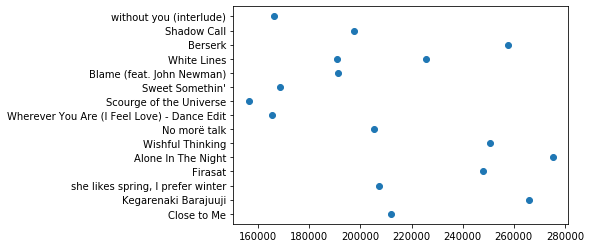

In [24]:
plt.scatter(x=df_visual['msPlayed'],y=df_visual['trackName'])

In [25]:
# This Graph shows the songs with the most listen time.

In [26]:
dfC.sort_values('msPlayed')
dfC.value_counts("trackName")

trackName
No morë talk                           7
G Minor Bach (From "Piano Tiles 2")    5
Close to Me                            4
Arpeggios from Hell                    4
TIME WILL TELL                         4
                                      ..
Icronic                                1
I Wanna Know (feat. Bea Miller)        1
I REMEMBER CLIFFORD                    1
I Can't Sleep 2                        1
逆夢                                     1
Length: 435, dtype: int64

In [27]:
value_counts = dfC['trackName'].value_counts()
duplicates = value_counts[value_counts > 2]
for trackName, count in duplicates.iteritems():
    print("There are {} instances of '{}'".format(count, trackName))

There are 7 instances of 'No morë talk'
There are 5 instances of 'G Minor Bach (From "Piano Tiles 2")'
There are 4 instances of 'Arpeggios from Hell'
There are 4 instances of 'TIME WILL TELL'
There are 4 instances of 'Close to Me'
There are 3 instances of 'Ghost'
There are 3 instances of 'ガラスのPALM TREE'
There are 3 instances of 'Lost in Thoughts All Alone (From "Fire Emblem Fates")'
There are 3 instances of 'Sunday Vibes'
There are 3 instances of 'Jelly Bean'
There are 3 instances of 'Meimei Memoria'
There are 3 instances of 'Réunion'
There are 3 instances of 'Flash Mountain'
There are 3 instances of 'Romanesque Romancia'
There are 3 instances of 'I Will Survive'
There are 3 instances of 'Berserk'
There are 3 instances of '5 Pieces, Op. 75, "The Trees": No. 3 Aspen'
There are 3 instances of 'White Lines'
There are 3 instances of 'Sekaiwa Kitto Aiwo Shitterunda'
There are 3 instances of 'Stormwater'
There are 3 instances of 'HEAVENLY PUNISHMENT'
There are 3 instances of 'Hard Cocktail'


/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12460 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/lib/python3/dist-pack

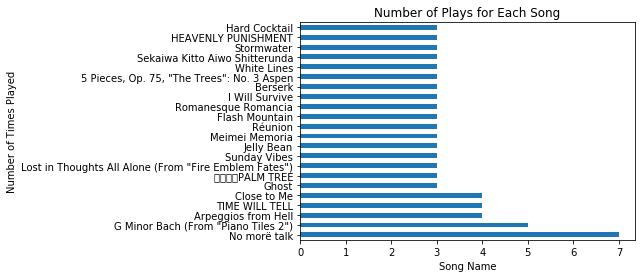

In [46]:
duplicates.plot(kind='barh')

plt.title('Number of Plays for Each Song')
plt.xlabel('Song Name')
plt.ylabel('Number of Times Played')
plt.show()

In [29]:
# This bar graph displays the songs played that were played the most times.
# For the songs that have the same value of plays, they are then ranked by total ms played.

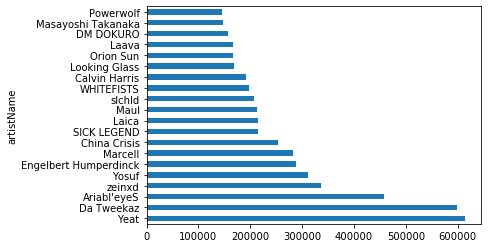

In [48]:
artist_playtime = dfC.groupby('artistName')['msPlayed'].sum()
top_10_artists = artist_playtime.nlargest(20)
top_10_artists.plot(kind='barh')

In [ ]:
#This graph shows my most listened to artists in terms of ms played.